# Gravity Modeling
------------------
* Due date: October 1, 2025

# Objectives
For this lab, we will be heading into the steam tunnels to take measurements of their size. Then we will forward model them to help plan our survey for next week.

Our objectives are:
* Measure details about the tunnels’ sizes, and depths.
* Familiarize yourself with modeling gravity in python
* Determine expected survey parameters (station spacing, observation times, etc.) for next week’s lab.


# Background
The gravity anomaly due to a 2D earth is made of infinitely long objects into and out of the page. We are going to model these objects as polygonal prisms with a constant density. We can make this assumption when the object is locally constant in at least 1 direction. For our long straight tunnel this is a valid assumption.

## Tunnels
The tunnels we are interested have a cross-section that looks approximately like this:

![Tunnel](resources/tunnel_cross.png)

**Figure 1**: Cross section of the Mines Steam Tunnels. To model them, you will need to get measurements for each dimension, and decide a density contrast value to use for them.

On canvas, we have also provided a plan view schematic of the steam tunnels to assist with your survey planning.

## 2D Gravity Modeling

Gravity modeling in 2D is generally accomplished by using analytical solutions of polygonal prisms taken from Blakely 1996. The equations themselves are beyond the scope of this course. However, you should be comfortable using code that implements them. An implementation of this analytic function is available in the `grav_utils/gpoly.py` script. The docstring of the function will give you an idea on how to call this function.

# Tasks

## Tunnel measurements

Our first task involves a nice tour of the tunnel. We will be taking measurements of the tunnels width, height, and depth (according to Figure 1).

Include your diagram of the tunnel's dimmensions.

# Gravity Modeling
After our tunnel adventure we will be modeling the gravitation response that we might expect of the tunnel, as well as a few other simple examples. Follow along below!


You should hopefully get experience
* Representing bodies as polygons.
* Simulating multiple bodies (and using the superposition principle)
* Modeling your own experiment (The Tunnel!)

## Supplying locations
In order to model gravity (and really any geophysics), we need to know where we want to calculate data. Below I create a set of x-locations along a line, with a specific station spacing. From -2500m to 2500m along profile, with stations every 50m, at 0m elevation.

**note**: If you were wanting to model at real-world locations you would likely read locations in from a data file.

In [1]:
import numpy as np
from grav_utils.grav_interact import GravInteract
import matplotlib.pyplot as plt

In [2]:
xmin, xmax = -2500, 2500
dx = 10

obs_x = np.linspace(xmin, xmax, (xmax-xmin)//dx + 1)  # linearly spaced locations!
obs_z = np.zeros_like(obs_x)  # an array of zeros that looks like obs_x

obs1 = np.c_[obs_x, obs_z]  # concatenate them together along a new axis

`obs1` is now a 2D array. (We do not need a third dimension because our model is 2D)

Each `obs1[i]` is a 1D array with two elements, the x and z coordinates of the observation point.

In [3]:
obs1.shape

(501, 2)

In [4]:
obs1

array([[-2500.,     0.],
       [-2490.,     0.],
       [-2480.,     0.],
       ...,
       [ 2480.,     0.],
       [ 2490.,     0.],
       [ 2500.,     0.]], shape=(501, 2))

## Modeling a Dike
Now let's define our dike:

In [5]:
# The x and z locations of the corners of the dike, arranged in a CW order.
dike_v = np.array([
    [-150.0, -100.0],
    [150.0, -100.0],
    [150.0, -1200.0],
    [-150.0, -1200.0]
])

We're going to use a simple interactive widget to model the gravity anomaly.
With it you can add polygons, change their position, add more points to the prism.

You can programmatrically add polygons to it using the
`set_polygons()` method.

You can also retrieve the polyons using the `get_polygons()` method.

Play around with this a bit, and answer some questions about the gravity data.

### Question 1:
1) What happens to the gravity anomaly when you move the object?
2) What happens when you increase the density contrast?
3) What changes when the density contrast changes from positive to negative

In [6]:
modeler = GravInteract(obs1)
modeler.set_polygons(dike_v)
modeler

GravInteract(children=(FigureWidget({
    'data': [{'mode': 'lines',
              'type': 'scatter',
        …

You can also programatically retrieve the polyons using the `get_polygons()` method.

(If in a jupyterlab, the save polygons and load polygons buttons should also work to save/load it to a file)

In [7]:
modeler.get_polygons()

[array([[-1269.74775939,  2664.03887742],
        [  297.53655883,  6184.54011759],
        [ 1959.80780543,  -288.13032398],
        [-2583.73360194,   722.23774494]])]

as well as the current data, if you wanted to plot it yourself in another way.

In [8]:
gz = modeler.get_data()

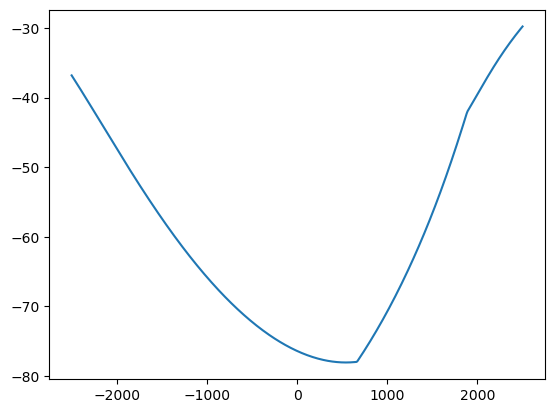

In [9]:
plt.plot(obs1[:, 0], gz)

### Question 2:
At any positive density contrast, adjust the polygon and describe the gravity field. Include an image of the gravity data, the location of the polygon's points, and the density contrast you used, for two cases:
   1) Right dipping.
   2) Left dipping.
     

## Superposition

As we discussed in class gravity follows a super-position principle.
For example, here are two dikes, both dipping in the same direction

To get the gravitational response, we can simply sum them together!

**_NOTE:_** You can pass multiple polygons to the `set_polygons()` function!

In [10]:
dike_v2 = dike_v + [1000, 50]

In [11]:
modeler2 = GravInteract(obs1)
modeler2.set_polygons([dike_v, dike_v2])
modeler2

GravInteract(children=(FigureWidget({
    'data': [{'mode': 'lines',
              'type': 'scatter',
        …

## Sample Spacing:
Next we're going to adjust the sample spacing and compare it to the image above with two dikes.

### Question 3)
Start from a large sample spacing, and decrease it until you find an acceptable spacing that you feel you would interpret the same way.

What is your final spacing?

In [12]:
dx = 1000

obs_x2 = np.linspace(xmin, xmax, (xmax-xmin)//dx + 1)
obs_z2 = np.zeros_like(obs_x2)

obs2 = np.c_[obs_x2, obs_z2]

In [13]:
# Again, starting another new widget with a different name so it doesn't clobber any others
modeler3 = GravInteract(obs2)
modeler3.set_polygons([dike_v, dike_v2])
modeler3

GravInteract(children=(FigureWidget({
    'data': [{'mode': 'lines',
              'type': 'scatter',
        …

### Question 4

Come up with your own model!
* Put as many bodies in as you like
    * While nothing stops you from putting them on top of each other, it might get a bit confusing.
    * Do not make a single body have intersecting lines.
* Come up with your own sampling over your model.
    * Change your minimum, maximum, and station spacing.


In [14]:
# these are all just starting points
dx_me = 10
xmin_me = -2500
xmax_me = 2500

obs_x3 = np.linspace(xmin_me, xmax_me, (xmax_me-xmin_me)//dx_me + 1)
obs_z3 = np.zeros_like(obs_x3)

obs3 = np.c_[obs_x3, obs_z3]

modeler4 = GravInteract(obs3)
modeler4

GravInteract(children=(FigureWidget({
    'data': [{'mode': 'lines',
              'type': 'scatter',
        …

## Tunnel Modeling
### Question 5
Now let's model the tunnels. You will need to:
1) Determine the coordinates of the corners of the tunnels.
2) Choose an appropriate density contrast value for the tunnel, (i.e. what is a range of expected densities of the surrounding material and the tunnel itself?).
3) Choose appropriate spatial sampling rates, and relative starting and ending positions for your survey (think at what point will the anomaly be unobservable by our instrument.)

## Preliminary plan:

### Question 6
Finally provided a plan for carrying out the gravity survey next week, things to consider in your plan:
1) In a 3 hour window, how many measurements with a single gravimeter can we take?
2) How long should we average values at each station?
3) Do we need to bring out anything else besides the gravimeter to perform our survey?
4) Where should we perform the survey?


# Deliverables:

For the sake of your grader, please include all of your responses in a copy of this notebook, you can insert new cells as needed.

**note**: The widget's are not static things and their states will not be saved when you save your notebook. If you have a final geometry and spacing you determine, you should add that programatically to the notebook so it can be reproduced.

You should all be comfortable with working in markdown for submitting responses to the questions asked above. This does not need to be a formal report but you should at least make comments that are justified by images of your models and data. (and make them easily findable by someone else) with: